In [1]:
from fastai import *
from fastai.text import *
import fastai
print(fastai.__version__)

1.0.57


In [2]:
from pathlib import Path
import pandas as pd

In [3]:
def load_text_as_df(file_path):
    with open(str(file_path), 'r', encoding='UTF-8') as f:
        str_list = f.readlines()
    return pd.DataFrame(str_list, columns=['text'])

In [4]:
fastai_data_path = Path('/storage/git/deep-math/data/interim/fastai/concat')
!ls {fastai_data_path}

data_bunch_arithmetics_25perc  extrapolate.csv	models
data_bunch_arithmetics_50perc  interpolate.csv	train.csv


In [5]:
train_path = fastai_data_path/'train.csv'
inter_path = fastai_data_path/'interpolate.csv'
extra_path = fastai_data_path/'extrapolate.csv'

In [6]:
df_train = load_text_as_df(train_path)
df_inter = load_text_as_df(inter_path)
df_extra = load_text_as_df(extra_path)

In [7]:
df_train.head()

,text
0,What is 1 + -9 - -5 - -1? -2\n
1,-2 + 0 + (3 - 1) 0\n
2,Calculate 8 - (0 + 7 + -4). 5\n
3,What is the value of (-19 - -12) + (-6 - -5) -...
4,Evaluate (2 + -8 - -2) + -120 + 129. ...


In [8]:
class CharTokenizer(BaseTokenizer):
    def tokenizer(self, t):
        return ['xxbos'] + list(t.replace('xxbos', '').replace(' ', '_'))
tok = Tokenizer(tok_func=CharTokenizer, pre_rules=[], post_rules=[], special_cases=[])

In [9]:
data = TextLMDataBunch.from_df(fastai_data_path, df_train.sample(frac=0.25) ,df_inter, df_extra,
                               tokenizer=tok, text_cols=0)

In [10]:
data.show_batch()

idx,text
0,( - 1 _ - _ 7 ) * ( - 3 _ - _ 4 9 / ( - 1 4 ) ) . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 4 \n xxbos _ W h a t _ i s _ 0 . 4 _ - _ 7 8 2 9 ? _ _ _ _ _
1,S i m p l i f y _ ( - 2 * 2 * s q r t ( 2 4 3 ) _ - _ ( s q r t ( 2 4 3 ) _ + _ 5 * 2 * s q r t ( 2 4 3 ) _ + _ s q r t ( 2 4 3 ) ) ) / ( (
2,a n d _ - 1 . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 3 5 . 3 2 \n xxbos _ 3 _ * _ 8 . 9 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 2 6 . 7 \n xxbos _ I n _ b a s e _ 1
3,9 0 4 2 2 _ p l u s _ - 0 . 3 ? _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 1 1 3 2 0 2 6 9 0 4 2 2 . 3 \n xxbos _ W h a t _ i s _ - 1 * ( - 4 ) / 4 * 2 /
4,4 ) * - 4 * 5 * ( - 1 0 ) / ( - 1 2 5 ) ? _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 8 \n xxbos _ D i v i d e _ - 1 6 3 5 0 _ b y _ 3 2 7 . _ _ _ _ _ _ _


In [11]:
data.save('data_bunch_arithmetics_25perc')

In [12]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 1.32E-01


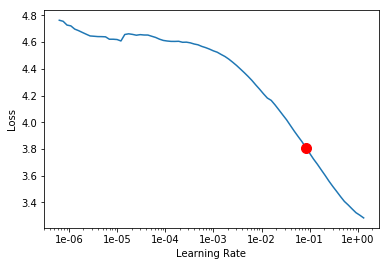

In [13]:
learn.lr_find()
learn.recorder.plot(skip_start=10, skip_end=10, suggestion=True)

In [14]:
learn.fit_one_cycle(10, 0.02)

epoch,train_loss,valid_loss,accuracy,time
0,0.931580,0.892724,0.708046,1:06:41
1,0.926415,0.890065,0.708769,1:06:45
2,0.919130,0.899690,0.710071,1:06:45
3,0.931552,0.897678,0.707299,1:06:46
4,0.913342,0.892686,0.708070,1:06:46
5,0.924522,0.889046,0.710032,1:06:48
6,0.917520,0.885040,0.710360,1:06:46
7,0.905601,0.881047,0.710526,1:06:46
8,0.903584,0.878826,0.710804,1:06:47
9,0.896460,0.878453,0.711151,1:06:47


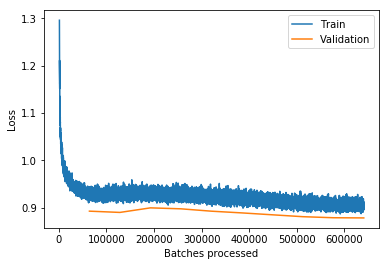

In [17]:
learn.recorder.plot_losses(skip_start=1000)

In [16]:
learn.save('arithmetics_25perc')

In [26]:
df_train['text'].iloc[2]

'Calculate 8 - (0 + 7 + -4).                5\n'

In [33]:
for i in range(20):
    text = df_train['text'].iloc[i]
    print(learn.predict(text.split(' '*16)[0], n_words=20))
    print('solution:', text.split(' '*16)[1])
    print()

What is 1 + -9 - -5 - -1? _ _ _ _ _ _ _ _ _ _ _ _ _ _ 6 3 2 
 xxbos _
solution: -2


-2 + 0 + (3 - 1) _ + _ 6 _ + _ 1 . _ _ _ _ _ _ _ _ _ _ _
solution: 0


Calculate 8 - (0 + 7 + -4). _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 9 
 xxbos _ M
solution: 5


What is the value of (-19 - -12) + (-6 - -5) - -15? _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 4 6
solution: 7


Evaluate (2 + -8 - -2) + -120 + 129. _ _ _ _ _ _ _ _ _ _ _ _ _ - 1 
 xxbos _ W h
solution: 5


What is the value of (47 - 40) + -9 + 0? _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 1 5 
 xxbos _
solution: -2


Calculate -27 + 29 - (-2 + 3). _ _ _ _ _ _ _ _ _ _ _ _ _ 4 2 / 1 2 
 xxbos
solution: 1


Calculate (3 - 5) + (4 - 2) - -4. _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 7 7 0 
 xxbos
solution: 4


Calculate -7 + 7 + (-5 - -3). _ _ _ _ _ _ _ _ _ _ _ _ _ - 1 1 
 xxbos _ I
solution: -2


What is the value of 8 + -4 + 10 + -7? _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 1 4 
 xxbos _
solution: 7


What is the value of (-4 - -6) + (0 - -1) + 0? _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ - 1 
 xxbos